In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

a)Data Download and Reading

In [2]:
# colnames=['Ambient Temperature(AT)', 'Exhaust Vacuum(V)', 'Ambient Pressure(AP)', 'Relative Humidity(RH)', 'Predicted Electric Energy(PE)'] 

data = pd.ExcelFile("Folds5x2_pp.xlsx")
data = data.parse(data.sheet_names[0])


b)
i)How many rows are in this data set? How many columns? What do the rows
and columns represent?

In [3]:
print(data)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
5     26.27  59.44  1012.23  58.77  443.67
6     15.89  43.96  1014.02  75.24  467.35
7      9.48  44.71  1019.12  66.43  478.42
8     14.64  45.00  1021.78  41.25  475.98
9     11.74  43.56  1015.14  70.72  477.50
10    17.99  43.72  1008.64  75.04  453.02
11    20.14  46.93  1014.66  64.22  453.99
12    24.34  73.50  1011.31  84.15  440.29
13    25.71  58.59  1012.77  61.83  451.28
14    26.19  69.34  1009.48  87.59  433.99
15    21.42  43.79  1015.76  43.08  462.19
16    18.21  45.00  1022.86  48.84  467.54
17    11.04  41.74  1022.60  77.51  477.20
18    14.45  52.75  1023.97  63.59  459.85
19    13.97  38.47  1015.15  55.28  464.30
20    17.76  42.42  1009.09  66.26  468.27
21     5.41  40.07  1019.16  64.77  495.24
22     7.76

9568 rows x 5 columns

Columns Represent
Ambient Temperature (AT)
Ambient Pressure (AP)
Relative Humidity (RH) 
Exhaust Vacuum (V)
to predict the net hourly electrical
energy output (PE) of the plant.

Rows Represent 
The Data\Features consist dat of hourly average of various variables(columns) and there predicted energy in 6 years.

b)
ii)Make pairwise scatterplots of all the varianbles in the data set including the
predictors (independent variables) with the dependent variable. Describe
your findings.

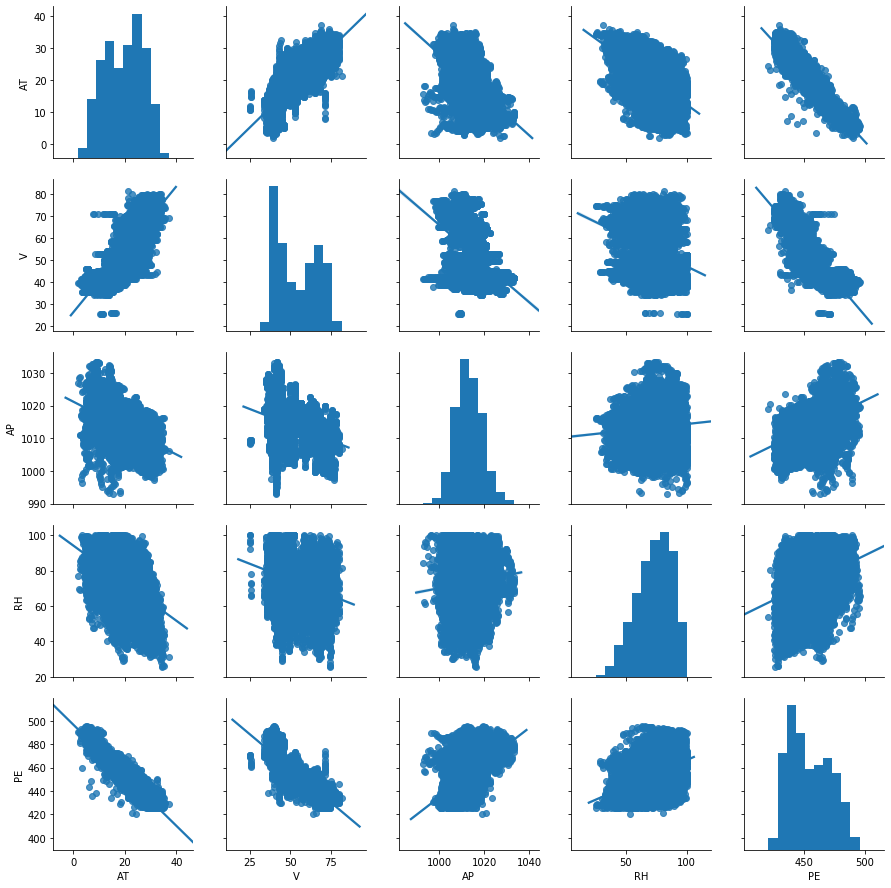

In [4]:
# sns.pairplot(data, vars=['AT','V','AP','RH','PE'] , hue=None)
sns.pairplot(data, kind="reg")

b)
iii)What are the mean, the median, range, first and third quartiles, and in-
terquartile ranges of each of the variables in the dataset? Summarize them
in a table.

In [5]:
# data.mean()
# data.median()
# data.max()
# data.min()
summary = data.describe()
summary = summary.drop(['count','std'])
summary = summary.append(pd.Series(name='Inter Quartile Range'))
summary = summary.append(pd.Series(name='Range'))
summary['AT']['Inter Quartile Range']= summary['AT']['75%']-summary['AT']['25%']
summary['AT']['Range']= summary['AT']['max']-summary['AT']['min']

summary['V']['Inter Quartile Range']= summary['V']['75%']-summary['V']['25%']
summary['V']['Range']= summary['V']['max']-summary['V']['min']

summary['AP']['Inter Quartile Range']= summary['AP']['75%']-summary['AP']['25%']
summary['AP']['Range']= summary['AP']['max']-summary['AP']['min']

summary['RH']['Inter Quartile Range']= summary['RH']['75%']-summary['RH']['25%']
summary['RH']['Range']= summary['RH']['max']-summary['RH']['min']

summary['PE']['Inter Quartile Range']= summary['PE']['75%']-summary['PE']['25%']
summary['PE']['Range']= summary['PE']['max']-summary['PE']['min']

summary = summary.rename({'50%': 'median','25%': 'First Quartile','75%': 'Third Quartile'}, axis='index')

summary





,AT,V,AP,RH,PE
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
min,1.810000,25.360000,992.890000,25.560000,420.260000
First Quartile,13.510000,41.740000,1009.100000,63.327500,439.750000
median,20.345000,52.080000,1012.940000,74.975000,451.550000
Third Quartile,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
Inter Quartile Range,12.210000,24.800000,8.160000,21.502500,28.680000
Range,35.300000,56.200000,40.410000,74.600000,75.500000


(c) For each predictor, fit a simple linear regression model to predict the response.
Describe your results. In which of the models is there a statistically significant
association between the predictor and the response? Create some plots to back
up your assertions. Are there any outliers that you would like to remove from
your data for each of these regression tasks?

In [6]:
X = data['AT']
y = data['PE']
X = np.array([X])
X = X.T

Text(0, 0.5, 'Predicted')

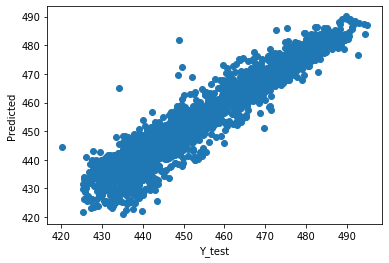

In [7]:
# I have taken 80:20 split for train:test respectively

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
clf = LinearRegression()
clf.fit(X_train, y_train)
y_predict=clf.predict(X_test)
plt.scatter(y_test, y_predict)
plt.xlabel("Y_test")
plt.ylabel("Predicted")
# plt.plot(y_test, X_test, color='red', linewidth=2)

In [8]:
mod = sm.OLS(y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)


#P value is less than 0.05 so it is statstically significant

x1    0.0
Name: P>|t|, dtype: float64


In [9]:


# The coefficients
coef_A= clf.coef_
print('Coefficients: \n', clf.coef_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test,y_predict))

print('Intercept: %.2f' % clf.intercept_)

Coefficients: 
 [-2.17087204]
Mean Absolute Error: 4.286759767737194
Mean Squared Error: 29.54206235662085
Root Mean Squared Error: 5.435261020100217
Variance score: 0.90
Intercept: 497.01


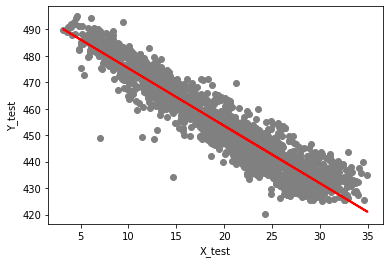

In [10]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_predict, color='red', linewidth=2)
plt.ylabel("Y_test")
plt.xlabel("X_test")
plt.show()


In [11]:
X = data['V']
y = data['PE']
X = np.array([X])
X = X.T

Text(0, 0.5, 'Predicted')

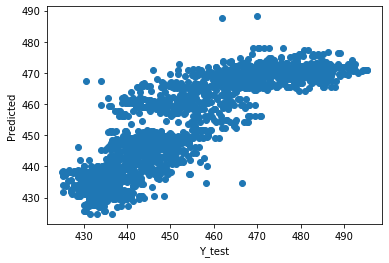

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
clf = LinearRegression()
clf.fit(X_train, y_train)
y_predict=clf.predict(X_test)
plt.scatter(y_test, y_predict)
plt.xlabel("Y_test")
plt.ylabel("Predicted")

In [13]:
mod = sm.OLS(y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)


#P value is less than 0.05 so it is statstically significant

x1    0.0
Name: P>|t|, dtype: float64


In [14]:


# The coefficients
coef_B= clf.coef_
print('Coefficients: \n', clf.coef_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test,y_predict))

print('Intercept: %.2f' % clf.intercept_)

Coefficients: 
 [-1.16641717]
Mean Absolute Error: 6.682126327432364
Mean Squared Error: 73.24127197992799
Root Mean Squared Error: 8.558111472744907
Variance score: 0.75
Intercept: 517.75


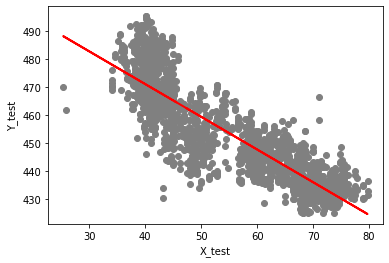

In [15]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_predict, color='red', linewidth=2)
plt.ylabel("Y_test")
plt.xlabel("X_test")
plt.show()


In [16]:
X = data['AP']
y = data['PE']
X = np.array([X])
X = X.T

Text(0, 0.5, 'Predicted')

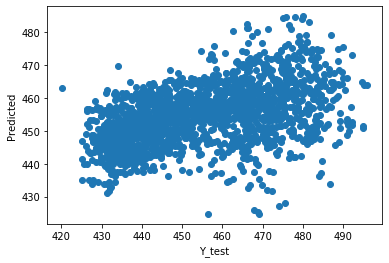

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
clf = LinearRegression()
clf.fit(X_train, y_train)
y_predict=clf.predict(X_test)
plt.scatter(y_test, y_predict)
plt.xlabel("Y_test")
plt.ylabel("Predicted")

In [18]:
mod = sm.OLS(y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
p_values
#P value is less than 0.05 so it is statstically significant

x1    0.0
Name: P>|t|, dtype: float64

In [19]:


# The coefficients
coef_C= clf.coef_
print('Coefficients: \n', clf.coef_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test,y_predict))

print('Intercept: %.2f' % clf.intercept_)

Coefficients: 
 [1.51922595]
Mean Absolute Error: 12.133455217261412
Mean Squared Error: 221.70770106541772
Root Mean Squared Error: 14.889852284875687
Variance score: 0.23
Intercept: -1084.96


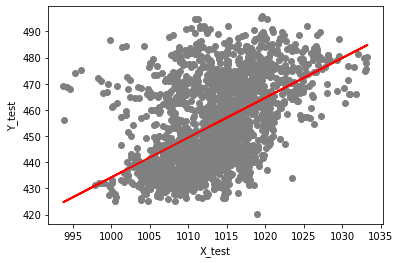

In [20]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_predict, color='red', linewidth=2)
plt.ylabel("Y_test")
plt.xlabel("X_test")
plt.show()


In [21]:
X = data['RH']
y = data['PE']
X = np.array([X])
X = X.T

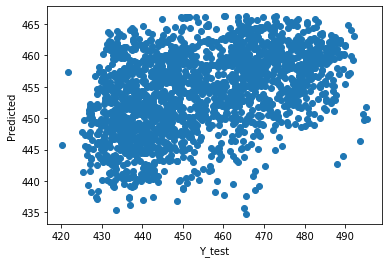

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
clf = LinearRegression()
clf.fit(X_train, y_train)
y_predict=clf.predict(X_test)
#Scateer Plot b/w y_test and Y_Pred
plt.xlabel("Y_test")
plt.ylabel("Predicted")
plt.scatter(y_test, y_predict)

In [23]:
mod = sm.OLS(y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)
#P value is less than 0.05 so it is statstically significant

x1    0.0
Name: P>|t|, dtype: float64


In [24]:
# The coefficients
coef_D= clf.coef_
print('Coefficients: \n', clf.coef_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test,y_predict))

print('Intercept: %.2f' % clf.intercept_)

Coefficients: 
 [0.44515317]
Mean Absolute Error: 12.889462431272822
Mean Squared Error: 237.8731684278917
Root Mean Squared Error: 15.423137437885059
Variance score: 0.18
Intercept: 421.64


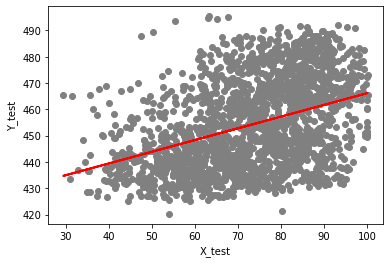

In [25]:
# plot between test data and Line shows predicted y due to Linear regression
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_predict, color='red', linewidth=2)
plt.ylabel("Y_test")
plt.xlabel("X_test")
plt.show()

d)
Fit a multiple regression model to predict the response using all of the predictors.
Describe your results. For which predictors can we reject the null hypothesis
H0 : Bj = 0?

In [26]:
X_Mul = data[["AT", "V", "AP", "RH"]]
y_Mul = data["PE"]
# # X = np.array([X])
# # X = X.T

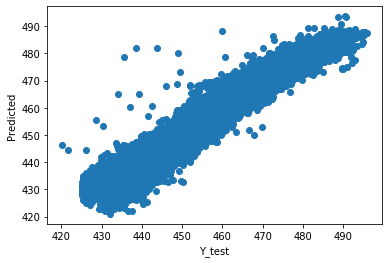

In [27]:
# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
# # y_test
clf = LinearRegression()
clf.fit(X_Mul, y_Mul)
y_predict=clf.predict(X_Mul)
# y_predict
plt.xlabel("Y_test")
plt.ylabel("Predicted")
plt.scatter(y_Mul, y_predict)

In [28]:
mod = sm.OLS(y_Mul,X_Mul)
# mod
fii = mod.fit()
# fii
fii.summary().tables[1]
# p_values = fii.summary2().tables[1]['P>|t|']
# print(p_values)

#P value is less than 0.05 so it is statstically significant


,coef,std err,t,P>|t|,[0.025,0.975]
AT,-1.6781,0.015,-109.169,0.000,-1.708,-1.648
V,-0.2726,0.008,-34.019,0.000,-0.288,-0.257
AP,0.5028,0.000,1209.083,0.000,0.502,0.504
RH,-0.0999,0.004,-22.678,0.000,-0.109,-0.091


In [29]:
# summary 2 evaluates till more number of zeroes
p_values = fii.summary2().tables[1]
p_values

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
AT,-1.678056,0.015371,-109.168665,0.000000e+00,-1.708187,-1.647925
V,-0.272647,0.008015,-34.018571,1.502751e-239,-0.288358,-0.256937
AP,0.502796,0.000416,1209.082808,0.000000e+00,0.501981,0.503611
RH,-0.099927,0.004406,-22.677679,6.053555e-111,-0.108565,-0.091290


since p values are nearing to 0 which implies null hypotesis is rejected and values 


SO For AT and AP we can reject null hypothesis

In [30]:
# The coefficients
coef_Multiple= clf.coef_
print('Coefficients: \n', clf.coef_)



Coefficients: 
 [-1.97751311 -0.23391642  0.06208294 -0.1580541 ]


E)

In [31]:
coef_linear=[coef_A,coef_B,coef_C,coef_D]
coef_linear = pd.DataFrame(coef_linear) 
coef_Multiple = pd.DataFrame(coef_Multiple)
print(coef_Multiple)
print("\n")
print(coef_linear)

          0
0 -1.977513
1 -0.233916
2  0.062083
3 -0.158054


          0
0 -2.170872
1 -1.166417
2  1.519226
3  0.445153


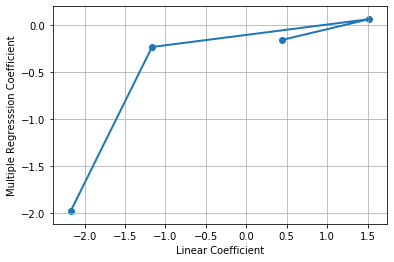

In [32]:
plt.plot(coef_linear, coef_Multiple, linewidth=2.0)
plt.scatter(coef_linear, coef_Multiple)
plt.xlabel("Linear Coefficient")
plt.ylabel("Multiple Regresssion Coefficient")
plt.grid(True)
plt.show()

f)

In [33]:
X = data['AT']
y = data['PE']
X = np.array([X])
X = X.T
poly = PolynomialFeatures(3)
X = poly.fit_transform(X)
# print (Y)
# prints [[ 1  2  3  4  6  9  8 12 18 27]]
# print (poly.powers_)

In [34]:
mod = sm.OLS(y,X)
fii = mod.fit()
# p_values = fii.summary2().tables[1]['P>|t|']
p_values = fii.summary().tables[1]
p_values

,coef,std err,t,P>|t|,[0.025,0.975]
const,492.7281,0.673,732.248,0.000,491.409,494.047
x1,-0.6103,0.124,-4.941,0.000,-0.852,-0.368
x2,-0.1251,0.007,-18.199,0.000,-0.139,-0.112
x3,0.0027,0.000,22.594,0.000,0.002,0.003


In [35]:
X = data['V']
y = data['PE']
X = np.array([X])
X = X.T
poly = PolynomialFeatures(3)
X = poly.fit_transform(X)

In [36]:
mod = sm.OLS(y,X)
fii = mod.fit()
# p_values = fii.summary2().tables[1]['P>|t|']
p_values = fii.summary().tables[1]
p_values

,coef,std err,t,P>|t|,[0.025,0.975]
const,554.1468,9.151,60.557,0.000,536.209,572.084
x1,-2.1444,0.509,-4.214,0.000,-3.142,-1.147
x2,-0.0027,0.009,-0.294,0.768,-0.021,0.015
x3,0.0001,5.45e-05,2.465,0.014,2.75e-05,0.000


In [37]:
X = data['AP']
y = data['PE']
X = np.array([X])
X = X.T
poly = PolynomialFeatures(3)
X = poly.fit_transform(X)

In [38]:
mod = sm.OLS(y,X)
fii = mod.fit()
# p_values = fii.summary2().tables[1]['P>|t|']
p_values = fii.summary().tables[1]
p_values

,coef,std err,t,P>|t|,[0.025,0.975]
const,0.0747,0.009,8.415,0.000,0.057,0.092
x1,25.2556,3.001,8.415,0.000,19.372,31.139
x2,-0.0500,0.006,-8.439,0.000,-0.062,-0.038
x3,2.514e-05,2.92e-06,8.613,0.000,1.94e-05,3.09e-05


In [39]:
p_values = fii.summary2().tables[1]
p_values

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,0.074694,0.008877,8.414737,4.502734e-17,0.057294,0.092093
x1,25.255593,3.001353,8.414736,4.502735e-17,19.372305,31.138881
x2,-0.049952,0.005919,-8.438959,3.666705e-17,-0.061555,-0.038349
x3,0.000025,0.000003,8.612716,8.264146e-18,0.000019,0.000031


In [40]:
X = data['RH']
y = data['PE']
X = np.array([X])
X = X.T
poly = PolynomialFeatures(3)
X = poly.fit_transform(X)

In [41]:
mod = sm.OLS(y,X)
fii = mod.fit()
# p_values = fii.summary2().tables[1]['P>|t|']
p_values = fii.summary2().tables[1]
p_values

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,468.413536,10.544723,44.421608,0.000000,447.743644,489.083428
x1,-1.729211,0.486174,-3.556775,0.000377,-2.682215,-0.776207
x2,0.032145,0.007251,4.433029,0.000009,0.017931,0.046359
x3,-0.000152,0.000035,-4.339877,0.000014,-0.000221,-0.000083


All all the values except V2 are Significant that is less than 0.05 and V2 is not significant as it has value greater than 0.05.
SO, Yes there is non linear association between predictors and response.

g)
Is there evidence of association of interactions of predictors with the response? To
answer this question, run a full linear regression model with all pairwise interaction
terms and state whether any interaction terms are statistically significant.

In [42]:
X = data[["AT", "V", "AP", "RH"]]
y = data["PE"]
poly = PolynomialFeatures(2)
X = poly.fit_transform(X)

In [43]:
mod = sm.OLS(y,X)
fii = mod.fit()
# p_values = fii.summary2().tables[1]['P>|t|']
#summary2() has more number of trailing zeores
feature_names = poly.get_feature_names(input_features = ['AT', 'V', 'AP', 'RH'])

p_values = fii.summary2().tables[1]
p_values


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,-7503.732330,1207.276400,-6.215422,5.332633e-10,-9870.250431,-5137.214230
x1,-5.796893,3.092149,-1.874714,6.086263e-02,-11.858162,0.264375
x2,-3.044298,1.497538,-2.032869,4.209339e-02,-5.979791,-0.108806
x3,15.628388,2.340613,6.677048,2.573717e-11,11.040289,20.216488
x4,3.919361,0.879162,4.458064,8.364685e-06,2.196016,5.642706
x5,0.016326,0.003077,5.306589,1.141985e-07,0.010296,0.022357
x6,0.011970,0.002682,4.462596,8.190000e-06,0.006712,0.017228
x7,0.003115,0.003004,1.036889,2.998138e-01,-0.002774,0.009004
x8,-0.006082,0.001499,-4.056312,5.025005e-05,-0.009021,-0.003143
x9,-0.001260,0.000784,-1.606486,1.082002e-01,-0.002797,0.000277


In [44]:
print("Sequence from const to x14 is :",feature_names)
# for i in range(1,15,1):
#     'x' + i =feature_names[i]
# # print(x3)
p_values = fii.summary().tables[1]
p_values
# type(p_values)

Sequence from const to x14 is : ['1', 'AT', 'V', 'AP', 'RH', 'AT^2', 'AT V', 'AT AP', 'AT RH', 'V^2', 'V AP', 'V RH', 'AP^2', 'AP RH', 'RH^2']


,coef,std err,t,P>|t|,[0.025,0.975]
const,-7503.7323,1207.276,-6.215,0.000,-9870.250,-5137.214
x1,-5.7969,3.092,-1.875,0.061,-11.858,0.264
x2,-3.0443,1.498,-2.033,0.042,-5.980,-0.109
x3,15.6284,2.341,6.677,0.000,11.040,20.216
x4,3.9194,0.879,4.458,0.000,2.196,5.643
x5,0.0163,0.003,5.307,0.000,0.010,0.022
x6,0.0120,0.003,4.463,0.000,0.007,0.017
x7,0.0031,0.003,1.037,0.300,-0.003,0.009
x8,-0.0061,0.001,-4.056,0.000,-0.009,-0.003
x9,-0.0013,0.001,-1.606,0.108,-0.003,0.000


In [45]:
feature_names = poly.get_feature_names(input_features = ['AT', 'V', 'AP', 'RH'])
X_B = pd.DataFrame(data=X, columns=feature_names)
X_B.head()

,1,AT,V,AP,RH,AT^2,AT V,AT AP,AT RH,V^2,V AP,V RH,AP^2,AP RH,RH^2
0,1.0,14.96,41.76,1024.07,73.17,223.8016,624.7296,15320.0872,1094.6232,1743.8976,42765.1632,3055.5792,1.048719e+06,74931.2019,5353.8489
1,1.0,25.18,62.96,1020.04,59.08,634.0324,1585.3328,25684.6072,1487.6344,3963.9616,64221.7184,3719.6768,1.040482e+06,60263.9632,3490.4464
2,1.0,5.11,39.40,1012.16,92.14,26.1121,201.3340,5172.1376,470.8354,1552.3600,39879.1040,3630.3160,1.024468e+06,93260.4224,8489.7796
3,1.0,20.86,57.32,1010.24,76.64,435.1396,1195.6952,21073.6064,1598.7104,3285.5824,57906.9568,4393.0048,1.020585e+06,77424.7936,5873.6896
4,1.0,10.82,37.50,1009.23,96.62,117.0724,405.7500,10919.8686,1045.4284,1406.2500,37846.1250,3623.2500,1.018545e+06,97511.8026,9335.4244


#NOTE: p value<0.05 is considered significant


'V'(x2), 'AP'(x3), 'RH'(x4), 'AT^2'(x5), 'AT V'(x6),'AT RH'(x8), 'AP^2'(x12), 'AP RH'(x13), 'RH^2'(14)are significant
rest are not significant


'V', 'AT AP', 'V^2', 'V AP', 'V RH' Not Significant

h)Can you improve your model using possible interaction terms or nonlinear asso-
ciations between the predictors and response? Train the regression model on a
randomly selected 70% subset of the data with all predictors. Also, run a regres-
sion model involving all possible interaction terms and quadratic nonlinearities,
and remove insignificant variables using p-values (be careful about interaction
terms). Test both models on the remaining points and report your train and test
MSEs.

In [46]:
# Model A is Multiple Linear Regression
X_A = data[["AT", "V", "AP", "RH"]]
y_A = data["PE"]
# dataframe = data.frame()
XA_train, XA_test, yA_train, yA_test = train_test_split(X_A, y_A,test_size=0.3,random_state=42)
# y_test
# print(yA_train.shape())
clf = LinearRegression()
clf.fit(XA_train, yA_train)
# clf.predict(XA_train)
errorA_Training = mean_squared_error(yA_train, clf.predict(XA_train))
# errorA_Training
errorA_Testing =  mean_squared_error(yA_test, clf.predict(XA_test))
# errorA_Testing
print("For Model A"," Training MSEs is:", errorA_Training, " Testing MSEs is:", errorA_Testing)




For Model A  Training MSEs is: 20.580839725738695  Testing MSEs is: 21.239856938225497


In [47]:
# SInce p values are less only for AT and AP we choose them as predictors for MODEL B
X_B = data[["AT", "V", "AP", "RH"]]
y_B = data["PE"]
poly = PolynomialFeatures(2, interaction_only=False, include_bias=False)
X_B = poly.fit_transform(X_B)
feature_names = poly.get_feature_names(input_features = ['AT', 'V', 'AP', 'RH'])
X_B = pd.DataFrame(data=X_B, columns=feature_names)
X_B.head()

,AT,V,AP,RH,AT^2,AT V,AT AP,AT RH,V^2,V AP,V RH,AP^2,AP RH,RH^2
0,14.96,41.76,1024.07,73.17,223.8016,624.7296,15320.0872,1094.6232,1743.8976,42765.1632,3055.5792,1.048719e+06,74931.2019,5353.8489
1,25.18,62.96,1020.04,59.08,634.0324,1585.3328,25684.6072,1487.6344,3963.9616,64221.7184,3719.6768,1.040482e+06,60263.9632,3490.4464
2,5.11,39.40,1012.16,92.14,26.1121,201.3340,5172.1376,470.8354,1552.3600,39879.1040,3630.3160,1.024468e+06,93260.4224,8489.7796
3,20.86,57.32,1010.24,76.64,435.1396,1195.6952,21073.6064,1598.7104,3285.5824,57906.9568,4393.0048,1.020585e+06,77424.7936,5873.6896
4,10.82,37.50,1009.23,96.62,117.0724,405.7500,10919.8686,1045.4284,1406.2500,37846.1250,3623.2500,1.018545e+06,97511.8026,9335.4244


In [48]:
X_B = X_B.drop(['V', 'AT AP', 'V^2', 'V AP', 'V RH'], axis=1)
XB_train, XB_test, yB_train, yB_test = train_test_split(X_B, y_B,test_size=0.3,random_state=42)
clf = LinearRegression()
clf.fit(XB_train, yB_train)
errorB_Training = mean_squared_error(yB_train, clf.predict(XB_train))
# errorA_Training
errorB_Testing =  mean_squared_error(yB_test, clf.predict(XB_test))
# errorA_Testing
print("For Model B"," Training MSEs is:", errorB_Training, " Testing MSEs is:", errorB_Testing)
# clf.predict(XA_train)


For Model B  Training MSEs is: 18.457177417725497  Testing MSEs is: 19.221018954966766


(i) KNN Regression:
i. Perform k-nearest neighbor regression for this dataset using both normalized
and raw features. Find the value of k 2 f1; 2; : : : ; 100g that gives you the
best t. Plot the train and test errors in terms of 1=k.

In [49]:
#Raw Features
X = data[["AT", "V", "AP", "RH"]]

y = data['PE']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [50]:
list_k = list()
error_k = 0
error_Minimum = float('inf')
errors_Training = list()
errors_Testing = list()

best_score = float('inf')
best_k = 0
for i in range(1,101,1):
    KNR = KNeighborsRegressor(i)
    KNR.fit(X_train,y_train)
    list_k.append(1/i)
    y_predict = KNR.predict(X_test)
    score = r2_score(y_test, y_predict)
    error_Training = mean_squared_error(y_train, KNR.predict(X_train))
    error_Testing =  mean_squared_error(y_test, KNR.predict(X_test))
    
    errors_Training.append(error_Training)
    errors_Testing.append(error_Testing)
    
#     print(score)
    if error_Testing < best_score:
        best_score = error_Testing
        best_k = i


print("The Best k is ",best_k," and Test Error is :",best_score)

The Best k is  6  and Test Error is : 15.130839099326604


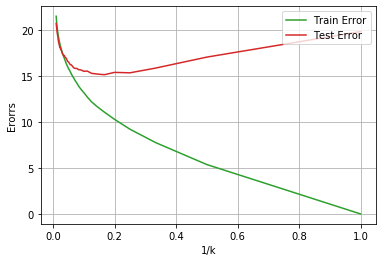

In [51]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(list_k, errors_Training, label="Train Error", color='tab:green')
ax.plot(list_k, errors_Testing, label="Test Error", color='tab:red')
plt.legend(loc='upper right')
plt.grid(True)
plt.xlabel("1/k")
plt.ylabel("Erorrs")
# plt.xlim(1,1/100)
plt.show()

In [52]:
#Normalized Features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
list_k = list()
error_k = 0
error_Minimum = float('inf')
errors_Training = list()
errors_Testing = list()

best_score = float('inf')
best_k = 0
for i in range(1,101,1):
    KNR = KNeighborsRegressor(i)
    KNR.fit(X_train_scaled,y_train)
    list_k.append(1/i)
    y_predict = KNR.predict(X_test_scaled)
    score = r2_score(y_test, y_predict)
    error_Training = mean_squared_error(y_train, KNR.predict(X_train_scaled))
    error_Testing =  mean_squared_error(y_test, KNR.predict(X_test_scaled))
    
    errors_Training.append(error_Training)
    errors_Testing.append(error_Testing)
    
#     print(score)
    if error_Testing < best_score:
        best_score = error_Testing
        best_k = i

print("The Best k is ",best_k," and Test Error is :",best_score)

The Best k is  4  and Test Error is : 13.713381468782657


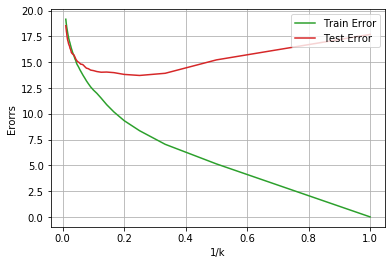

In [53]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(list_k, errors_Training, label="Train Error", color='tab:green')
ax.plot(list_k, errors_Testing, label="Test Error", color='tab:red')
plt.legend(loc='upper right')
plt.grid(True)
plt.xlabel("1/k")
plt.ylabel("Erorrs")
# plt.xlim(1,1/100)
plt.show()

j)Compare the results of KNN Regression with the linear regression model that has
the smallest test error and provide your analysis.

Model B has less Test error in Linear Regression model So if we choose Model B and compare test error in KNN Regression  with it 
it is way lesser then best Linear Regression model.

So KNN Regression Better than Linear Regression In terms of Test ERROR